### 1、正确率和错误率（手动计算）

In [188]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

#print(load_breast_cancer().DESCR)
# X为数据的特征，y为数据的标签
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(len(y_test))

# 训练与测试
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 对比
print(y_pred)
print(y_test)

# 计算accuracy与error
accuracy = np.sum(y_pred == y_test)/len(y_test)
print("正确率:",accuracy)
error = np.sum(y_pred != y_test)/len(y_test)
print("错误率:",error)

57
[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
正确率: 0.9473684210526315
错误率: 0.05263157894736842


### 2、正确率和错误率（Sklearn）

In [189]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
#help(accuracy_score)

#训练与测试
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 对比
print(y_pred)
print(y_test)

# 计算accuracy与error
accuracy = accuracy_score(y_test,y_pred)
print("正确率:",accuracy)
error = 1-accuracy
print("错误率:",error)

[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
正确率: 0.9473684210526315
错误率: 0.052631578947368474


### 3、混淆矩阵(手动计算)

In [190]:
#训练与测试
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 对比
print(y_pred)
print(y_test)

# 计算TP、FP、FN、TN
TP = np.sum((y_pred==0) & (y_test==0))
FP = np.sum((y_pred==0) & (y_test==1))

FN = np.sum((y_pred==1) & (y_test==0))
TN = np.sum((y_pred==1) & (y_test==1))

print('True Positive:',TP)
print('False Positive:',FP)
print('False Negative:',FN)
print('True Negative:',TN)

acc = (TP + TN) / (TP+FP+FN+TN)
print('Accuracy:',acc)

precision = TP / (TP+FP)
print('Precision:',precision)

recall = TP / (TP+FN)
print('Recall:',recall)

F1 = 2*(precision*recall) / (precision+recall)
print('F1:',F1)

[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
[1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1]
True Positive: 13
False Positive: 1
False Negative: 2
True Negative: 41
Accuracy: 0.9473684210526315
Precision: 0.9285714285714286
Recall: 0.8666666666666667
F1: 0.896551724137931


### 4、混淆矩阵(Sklearn计算)

In [191]:
from sklearn import metrics

print("混淆矩阵:\n",metrics.confusion_matrix(y_test,y_pred))

print("正确率:",metrics.accuracy_score(y_test,y_pred))

print("精确率:",metrics.precision_score(y_test,y_pred))

print("召回率:",metrics.recall_score(y_test,y_pred))

print("F1值:",metrics.f1_score(y_test,y_pred))

混淆矩阵:
 [[13  2]
 [ 1 41]]
正确率: 0.9473684210526315
精确率: 0.9534883720930233
召回率: 0.9761904761904762
F1值: 0.9647058823529412


In [177]:
#分类情况报告
print(metrics.classification_report(y_test,y_pred,target_names = load_breast_cancer().target_names))

             precision    recall  f1-score   support

  malignant       1.00      0.86      0.92        14
     benign       0.96      1.00      0.98        43

avg / total       0.97      0.96      0.96        57



### 5、多分类混淆矩阵(Sklearn)

In [195]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#训练与测试
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("混淆矩阵:\n",metrics.confusion_matrix(y_test,y_pred))
print("宏精确率:",metrics.precision_score(y_test,y_pred, average="macro"))
print("微精确率:",metrics.precision_score(y_test,y_pred, average="micro"))

混淆矩阵:
 [[24  0  0]
 [ 0 20 11]
 [ 0  0 20]]
宏精确率: 0.8817204301075269
微精确率: 0.8533333333333334


### 6、作业
在 “5、多分类混淆矩阵(Sklearn)” 基础上附上手动计算宏精确率、微精确率的代码

### 7、MSE(手动计算)

26
MSE: 24.184604669920525


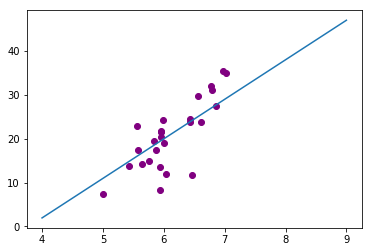

In [178]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = load_boston()
#print(dataset.DESCR)

# X为数据的特征，y为数据的标签
X,y = dataset.data[:,5:6],dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
print(len(y_test))

reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)
MSE = 1/len(y_test)*np.sum(np.square(y_test-y_pred))
print("MSE:",MSE)

plt.scatter(X_test,y_test,color="purple")
x = np.arange(4,10,1).reshape(-1,1)
plt.plot(x,reg.predict(x))

### 8、MSE(Sklearn计算)

In [179]:
from sklearn import metrics

MSE = metrics.mean_squared_error(y_test,y_pred)
print("MSE:",MSE)

MSE: 24.184604669920525
